<a href="https://colab.research.google.com/github/9075197427/Capstone2-/blob/main/Capstone_YesBank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data=pd.read_csv("/content/drive/MyDrive/Capstone 2/data_YesBank_StockPrices.csv")

In [ ]:
df_data.shape

(185, 5)

In [ ]:
df_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df_data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#details of given data set
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df_data.describe(include="all")

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


#data cleaning

In [ ]:
df_data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#Check for outlier


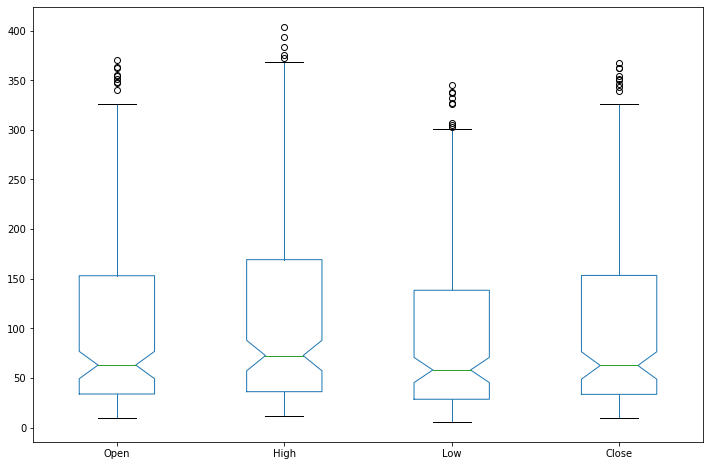

In [ ]:
fig = plt.figure(figsize =(12, 8))
boxplot = df_data.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)
 
plt.show()

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen quick within very few months thats why top value of stocks looks like outliers.

In [ ]:
# convert string object to datetime object
from datetime import datetime

df_data['Date'] = df_data['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
#Check the datatype of the columns after changing datatype of date
df_data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

#exploratory data analysis